In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

%matplotlib inline

In [2]:
blob_df = pd.read_csv("blob.csv")
dart_df = pd.read_csv("dart.csv")
outliers_df = pd.read_csv("outliers.csv")
spiral2_df = pd.read_csv("spiral2.csv")
basic2_df = pd.read_csv("basic2.csv")
boxes3_df = pd.read_csv("boxes3.csv")

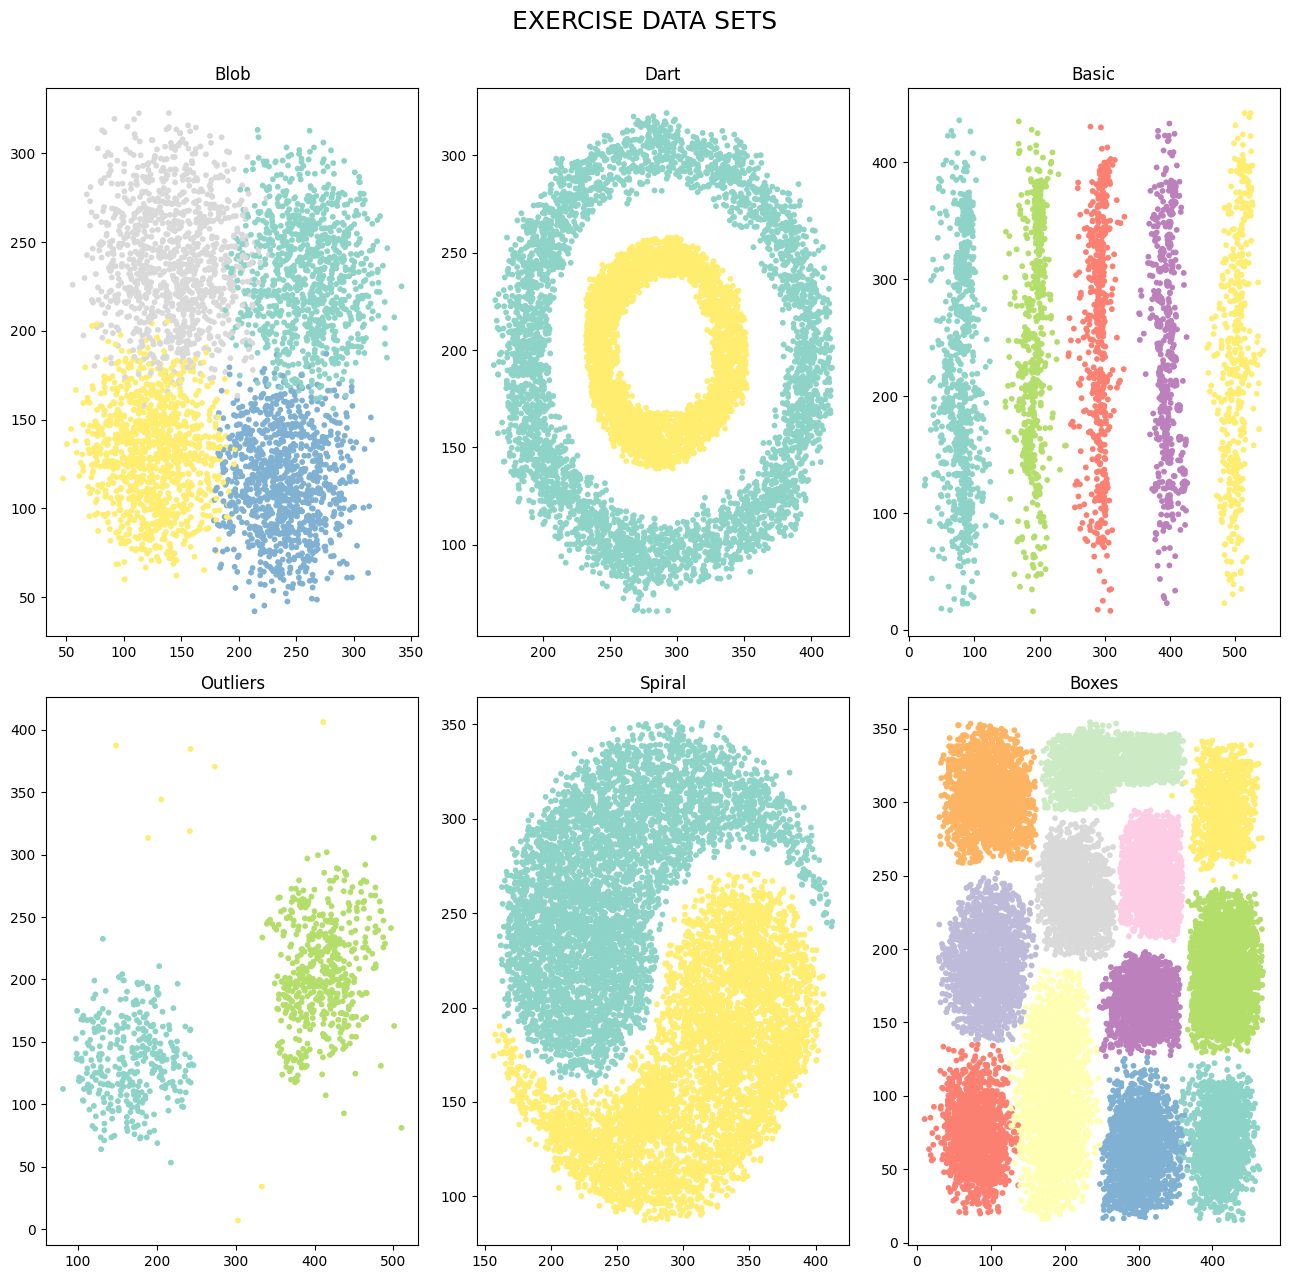

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(13,13))
fig.suptitle('EXERCISE DATA SETS\n', size = 18)

axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Blob");

axes[0,1].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap = "Set3")
axes[0,1].set_title("Dart");

axes[0,2].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap = "Set3")
axes[0,2].set_title("Basic");

axes[1,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Outliers");

axes[1,1].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap = "Set3")
axes[1,1].set_title("Spiral");

axes[1,2].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap = "Set3")
axes[1,2].set_title("Boxes");

plt.tight_layout()

In [4]:
df_blob_kmeans = blob_df.copy()
df_dart_kmeans = dart_df.copy()
df_basic_kmeans = basic2_df.copy()
df_outliers_kmeans = outliers_df.copy()
df_spiral2_kmeans = spiral2_df.copy()
df_boxes3_kmeans = boxes3_df.copy()

In [5]:
df_blob_kmeans.drop(['color'], axis = 1, inplace =True)
df_dart_kmeans.drop(['color'], axis = 1, inplace =True)
df_basic_kmeans.drop(['color'], axis = 1, inplace =True)
df_outliers_kmeans.drop(['color'], axis = 1, inplace =True)
df_spiral2_kmeans.drop(['color'], axis = 1, inplace =True)
df_boxes3_kmeans.drop(['color'], axis = 1, inplace =True)

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
# y_kmeans = kmeans.fit_predict(df_kmeans)

kmeans_blob = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_dart = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_basic = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans_outliers = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_spiral2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_boxes3 = KMeans(n_clusters = 12, init = 'k-means++', random_state = 42)

y_kmeans_blob = kmeans_blob.fit_predict(df_blob_kmeans)
y_kmeans_dart = kmeans_dart.fit_predict(df_dart_kmeans)
y_kmeans_basic = kmeans_basic.fit_predict(df_basic_kmeans)
y_kmeans_outliers = kmeans_outliers.fit_predict(df_outliers_kmeans)
y_kmeans_spiral2 = kmeans_spiral2.fit_predict(df_spiral2_kmeans)
y_kmeans_boxes3 = kmeans_boxes3.fit_predict(df_boxes3_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [7]:
df_blob_kmeans['Cluster'] = y_kmeans_blob
df_dart_kmeans['Cluster'] = y_kmeans_dart
df_basic_kmeans['Cluster'] = y_kmeans_basic
df_outliers_kmeans['Cluster'] = y_kmeans_outliers
df_spiral2_kmeans['Cluster'] = y_kmeans_spiral2
df_boxes3_kmeans['Cluster'] = y_kmeans_boxes3

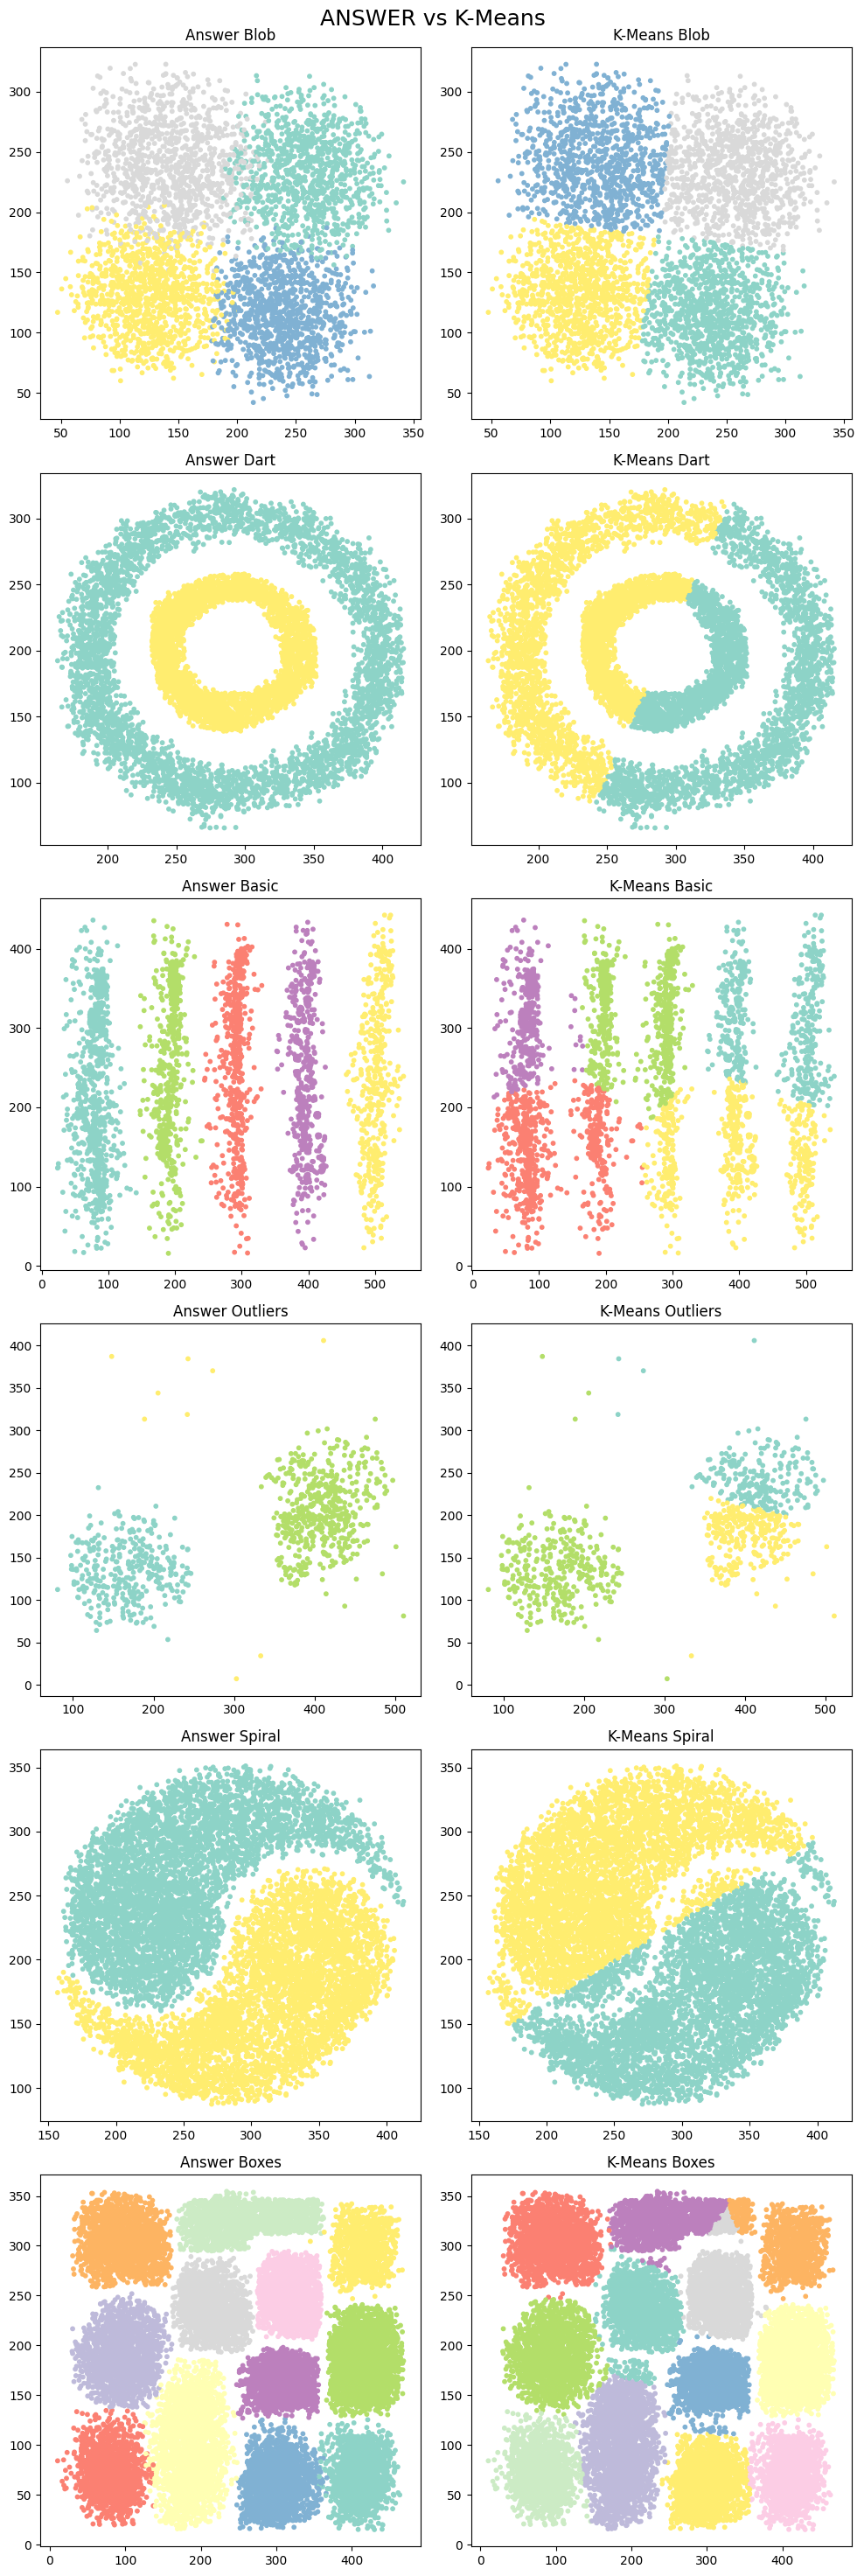

In [8]:
fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(10,30))
fig.suptitle('ANSWER vs K-Means\n', size = 18)

axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Blob");
axes[0,1].scatter(df_blob_kmeans['x'], df_blob_kmeans['y'], c=df_blob_kmeans['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("K-Means Blob");


axes[1,0].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer Dart");
axes[1,1].scatter(df_dart_kmeans['x'], df_dart_kmeans['y'], c=df_dart_kmeans['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("K-Means Dart");

axes[2,0].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer Basic");
axes[2,1].scatter(df_basic_kmeans['x'], df_basic_kmeans['y'], c=df_basic_kmeans['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("K-Means Basic");

axes[3,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer Outliers");
axes[3,1].scatter(df_outliers_kmeans['x'], df_outliers_kmeans['y'], c=df_outliers_kmeans['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("K-Means Outliers");

axes[4,0].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer Spiral");
axes[4,1].scatter(df_spiral2_kmeans['x'], df_spiral2_kmeans['y'], c=df_spiral2_kmeans['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("K-Means Spiral");

axes[5,0].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer Boxes");
axes[5,1].scatter(df_boxes3_kmeans['x'], df_boxes3_kmeans['y'], c=df_boxes3_kmeans['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("K-Means Boxes");

plt.tight_layout()